In [148]:
#Importing Libraries
import numpy as np
import pandas as pd

#Reading the Companies file and printing the column names for reference
companies = pd.read_csv(r"C:\Users\PINAKI\Desktop\upgrad\Assignment- 1(Investment)\companies.txt",sep='\t' ,engine='python')
print(companies.columns)

#Reading the rounds2 file and printing the column names for reference
rounds2 = pd.read_csv(r"C:\Users\PINAKI\Desktop\upgrad\Assignment- 1(Investment)\rounds2.csv", engine='python')
print(rounds2.columns)

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')
Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [149]:
#uniformalizing the company names in 'rounds2'
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

#unique companies present in 'rounds2'
len(rounds2.company_permalink.unique().tolist())

66368

In [150]:
#uniformalizing the company names in 'companies'
companies['permalink'] = companies['permalink'].str.lower()

#unique companies present in 'companies'
len(companies.permalink.unique().tolist())

66368

In [151]:
#converting key columns in both the tables, to Sets
round_set= set(rounds2.company_permalink)
comp_set= set(companies.permalink)

#Unique companies in 'rounds2' not in 'companies'
diff = list(round_set.difference(comp_set))
print(diff)
print(len(diff))

[]
0


In [152]:
#Merging the two Dataframes
master_frame = pd.merge(companies,rounds2.rename(columns={'company_permalink':'permalink'}), how='outer')

#entries in the merged dataframe
master_frame.shape

(114949, 15)

In [153]:
#dropping the rows with invested amount in blank
master_frame= master_frame[~np.isnan(master_frame['raised_amount_usd'])]
master_frame.head(10)

#finding average investment in various funding types
funding_type= master_frame.groupby("funding_round_type")
funding_type['raised_amount_usd'].mean()

funding_round_type
angel                    9.586945e+05
convertible_note         1.453439e+06
debt_financing           1.704353e+07
equity_crowdfunding      5.383682e+05
grant                    4.300576e+06
non_equity_assistance    4.112031e+05
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
private_equity           7.330859e+07
product_crowdfunding     1.363131e+06
secondary_market         7.964963e+07
seed                     7.198180e+05
undisclosed              1.924237e+07
venture                  1.174895e+07
Name: raised_amount_usd, dtype: float64

In [197]:
#top9 english speaking countries with max venture investment
venture = master_frame.loc[(master_frame.funding_round_type =='venture')]
country= venture.pivot_table(values = 'raised_amount_usd', index ='country_code', aggfunc='sum')

#filtering top9 entries from the dataframe
top9=(country.sort_values(by='raised_amount_usd',ascending=False)).iloc[0:9,:]

#printing the new dataframe
print(top9)

,raised_amount_usd
country_code,
USA,3.922376e+11
CHN,3.703144e+10
GBR,1.892439e+10
IND,1.353798e+10
CAN,8.715621e+09


In [196]:
#mapping list
mapping = pd.read_csv(r"C:\Users\PINAKI\Desktop\upgrad\Assignment- 1(Investment)\mapping.csv", engine='python')
mapping= mapping[~pd.isnull(mapping['category_list'])]
mapping.head(5)

#changing to mergable format
new_mapping = mapping.melt(id_vars=['category_list'])
new_mapping[new_mapping.value==1]
new_mapping= new_mapping.loc[new_mapping.value > 0]

#head of the new dataframe
new_mapping.head(5)

,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [156]:
#spliting the master frame category list
master_frame['category_list']= master_frame.category_list.str.split('|').str[0]

#head of the new dataframe
master_frame.head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0


In [157]:
# merging mapping and master frame
master_frame = pd.merge(master_frame,new_mapping, how='inner', on ='category_list')

#head of the new dataframe
master_frame.head(5)

#column names -> primary_sector = category_list and main_sector = variable

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,variable,value
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Entertainment,1
1,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Entertainment,1
2,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Entertainment,1
3,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Entertainment,1
4,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,Media,operating,USA,MT,Missoula,Missoula,31-07-2011,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.0,Entertainment,1


In [188]:
#creating data frame D1 - Country = USA , FT = venture
D1 = master_frame.loc[(master_frame.funding_round_type == 'venture') & (master_frame.country_code == 'USA')]
D1 =D1.loc[(D1.raised_amount_usd <= 15000000) & (D1.raised_amount_usd >= 5000000)]

# analyzing D1
print(D1.shape)
print(D1.raised_amount_usd.sum())

# pivot table on D1
print(D1.pivot_table(values = 'raised_amount_usd', index = 'variable', aggfunc = ('count', 'sum')))

# companies having maximum investment in the 1st top sector
D1_1 = D1.loc[(D1.variable=='Others')]
print(D1_1.loc[D1_1.raised_amount_usd.idxmax(),'name'])

# companies having maximum investment in the 2nd top sector
D1_2 = D1.loc[(D1.variable=='Cleantech / Semiconductors')]
print(D1_2.loc[D1_2.raised_amount_usd.idxmax(),'name'])

(11149, 17)
99661524549.0
                                         count           sum
variable                                                    
Automotive & Sports                        167  1.454104e+09
Cleantech / Semiconductors                2297  2.118100e+10
Entertainment                              580  5.000213e+09
Health                                     908  8.200859e+09
Manufacturing                              799  7.258553e+09
News, Search and Messaging                1563  1.379682e+10
Others                                    2923  2.608928e+10
Social, Finance, Analytics, Advertising   1912  1.668070e+10
1stdibs
480 Biomedical


In [190]:
#creating data frame D2 - Country = GBR , FT = venture
D2 = master_frame.loc[(master_frame.funding_round_type == 'venture') & (master_frame.country_code == 'GBR')]
D2 =D2.loc[(D2.raised_amount_usd <= 15000000) & (D2.raised_amount_usd >= 5000000)]

# analyzing D2
print(D2.shape)
print(D2.raised_amount_usd.sum())

# pivot table on D2
print(D2.pivot_table(values = 'raised_amount_usd', index = 'variable', aggfunc = ('count', 'sum')))

# companies having maximum investment in the 1st top sector
D2_1 = D2.loc[(D2.variable=='Others')]
print(D2_1.loc[D2_1.raised_amount_usd.idxmax(),'name'])

# companies having maximum investment in the 2nd top sector
D2_2 = D2.loc[(D2.variable=='Cleantech / Semiconductors')]
print(D2_2.loc[D2_2.raised_amount_usd.idxmax(),'name'])

(577, 17)
5028704358.0
                                         count           sum
variable                                                    
Automotive & Sports                         16  1.670516e+08
Cleantech / Semiconductors                 127  1.136905e+09
Entertainment                               54  4.615111e+08
Health                                      24  2.145375e+08
Manufacturing                               42  3.619403e+08
News, Search and Messaging                  73  6.157462e+08
Others                                     143  1.249124e+09
Social, Finance, Analytics, Advertising     98  8.218884e+08
Notonthehighstreet
Anadigm


In [195]:
#creating data frame D3 - Country = IND , FT = venture
D3 = master_frame.loc[(master_frame.funding_round_type == 'venture') & (master_frame.country_code == 'IND')]
D3 =D3.loc[(D3.raised_amount_usd <= 15000000) & (D3.raised_amount_usd >= 5000000)]

# analyzing D3
print(D3.shape)
print(D3.raised_amount_usd.sum())

# pivot table on D3
print(D3.pivot_table(values = 'raised_amount_usd', index = 'variable', aggfunc = ('count', 'sum')))

# companies having maximum investment in the 1st top sector
D3_1 = D3.loc[(D3.variable=='Others')]
print(D3_1.loc[D3_1.raised_amount_usd.idxmax(),'name'])

# companies having maximum investment in the 2nd top sector
D3_2 = D3.loc[(D3.variable=='News, Search and Messaging')]
print(D3_2.loc[D3_2.raised_amount_usd.idxmax(),'name'])

(299, 17)
2683537552.0
                                         count           sum
variable                                                    
Automotive & Sports                         13  1.369000e+08
Cleantech / Semiconductors                  20  1.653800e+08
Entertainment                               33  2.808300e+08
Health                                      19  1.677400e+08
Manufacturing                               21  2.009000e+08
News, Search and Messaging                  52  4.338345e+08
Others                                     109  1.007410e+09
Social, Finance, Analytics, Advertising     32  2.905435e+08
CaratLane
Mobile2Win India


920242235759.0
0.5926552511917416
0.016462600134305817
0.14321560909046882


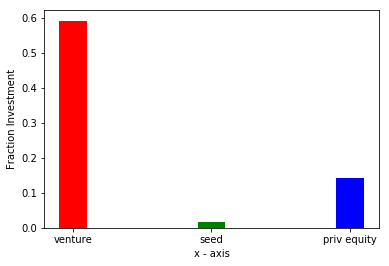

In [222]:
# Plot 1 - fraction of total investments vs avg investment in funds type
total_inv = master_frame['raised_amount_usd'].sum()
print(total_inv)

ven= master_frame.loc[(master_frame.funding_round_type == 'venture')]
frac_ven = ven['raised_amount_usd'].sum()/total_inv
print(frac_ven)

seed= master_frame.loc[(master_frame.funding_round_type == 'seed')]
frac_seed = seed['raised_amount_usd'].sum()/total_inv
print(frac_seed)

priv= master_frame.loc[(master_frame.funding_round_type == 'private_equity')]

frac_priv = priv['raised_amount_usd'].sum()/total_inv
print(frac_priv)

#graph
import matplotlib.pyplot as plt 
frac = [frac_ven, frac_seed, frac_priv]
avg = [ven['raised_amount_usd'].sum(), seed['raised_amount_usd'].mean(), priv['raised_amount_usd'].mean()]

tick_label =['venture', 'seed', 'priv equity']

plt.ylabel('Fraction Investment')
plt.xlabel('x - axis')

plt.bar(tick_label, frac, width = 0.2, color= ['red', 'green', 'blue', 'orange'])
plt.show() 

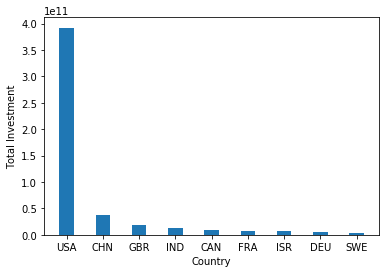

In [235]:
# Plot 2 - Total investment in venture against top 9 countries
xcont = []
ysum = []
xcont =top9.index.values.tolist()
ysum = top9.raised_amount_usd.tolist()

#graph
plt.ylabel('Total Investment')
plt.xlabel('Country')

plt.bar(xcont, ysum, width = 0.4)
plt.show() 

In [ ]:
#plot 3 

xcoutry= ["USA', 'GBR', 'IND']
top_sec = ['Others', 'Cleantech / Semiconductors','Social, Finance, Analytics, Advertising','Others', 'Cleantech / Semiconductors' ]
